In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop('species',axis=1)
y = df['species']

In [5]:
from sklearn.cluster import KMeans

### Finding the optimal number of clusters using the inertia of the models

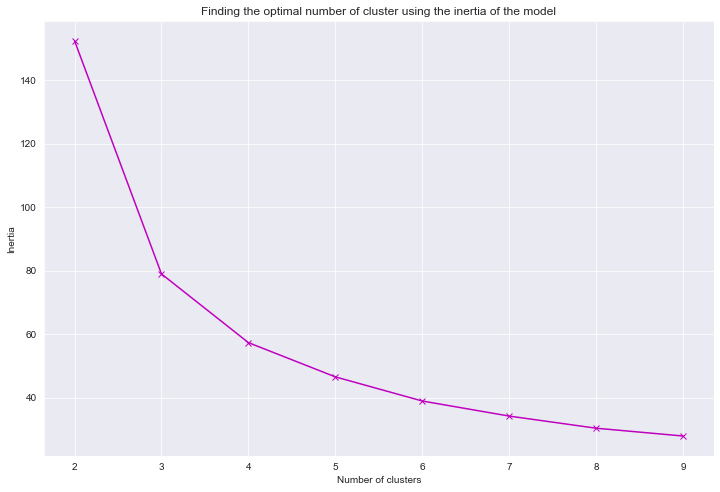

In [6]:
inertia_list = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), inertia_list, 'mx',ls='solid')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding the optimal number of cluster using the inertia of the model');

**By the looks of it we can conclude that the n_cluster=5 will give us the satisfactory results**

### Finding the optimal number of solutions using the silhouette score of the model

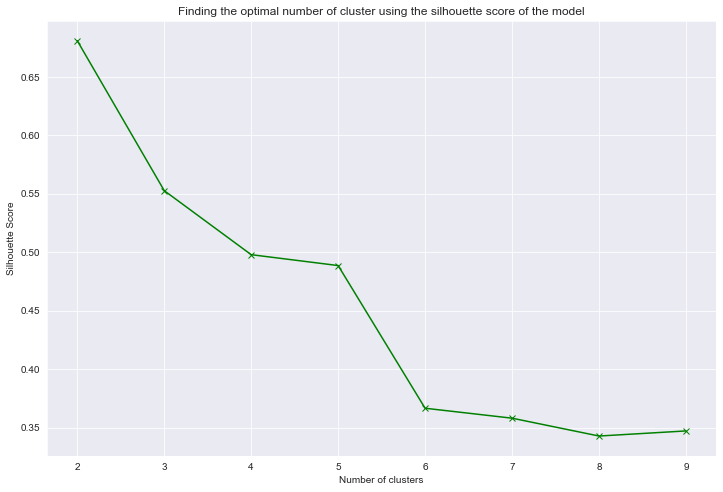

In [7]:
from sklearn.metrics import silhouette_score
sil_score_list = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sil_score_list.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), sil_score_list, 'gx',ls='solid')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding the optimal number of cluster using the silhouette score of the model');

**By looking at the graph it feels like as the optimal number of clusters for the model should be 4 or 5, since for that values inertia won't be too high as well as we will have good silhouette score**

In [8]:
## finding the optimal number of clusers using the kneed library
from kneed import KneeLocator

kn = KneeLocator(range(2,10),inertia_list,curve='convex',direction='decreasing')
print(f"The optimal number of clusters for the kmeans model: {kn.knee}")

The optimal number of clusters for the kmeans model: 4


In [9]:
## let's cluster the data into 4 clusters
kmeans_final = KMeans(n_clusters=4)
kmeans_final.fit(X)
cluster_assigned = kmeans_final.predict(X)

In [10]:
cluster_assigned

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3])

In [11]:
## finding the array containing the distance of the instances from each of the cluster
dist = kmeans_final.transform(X)

In [12]:
dist

array([[2.92385945, 5.1912985 , 0.14694217, 3.92901149],
       [2.85438706, 5.2501981 , 0.43816892, 3.94247781],
       [3.02460573, 5.41377457, 0.41230086, 4.1128009 ],
       [2.86313212, 5.28892287, 0.51883716, 3.97625845],
       [2.9712354 , 5.23565469, 0.19796969, 3.97701286],
       [2.72272654, 4.80847742, 0.68380699, 3.6086883 ],
       [2.97867848, 5.34470112, 0.41520116, 4.05532135],
       [2.82495711, 5.13543621, 0.0599333 , 3.85819015],
       [2.99446343, 5.46416326, 0.80099438, 4.13843343],
       [2.8185021 , 5.20302365, 0.36659514, 3.89924752],
       [2.87458515, 5.02719654, 0.48784424, 3.80271367],
       [2.78407919, 5.13013938, 0.25138019, 3.84364817],
       [2.91541907, 5.32666219, 0.49192682, 4.01480152],
       [3.33290261, 5.78739623, 0.90906105, 4.46767627],
       [3.25768714, 5.23171388, 1.02019214, 4.07610491],
       [3.14364844, 5.00526773, 1.21309192, 3.89642545],
       [3.06297424, 5.15741748, 0.66241377, 3.95912001],
       [2.89019719, 5.1549326 ,